# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Return Sequences and Return States

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [1]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

In [2]:
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from numpy import array
from keras.utils.vis_utils import plot_model

# What is an LSTM layers?
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The LSTM API is as follows: `LSTM(No_of_memory_units/cells)`
- Each unit or cell within the layer has an internal cell state, often abbreviated as “c“, and outputs a hidden state, often abbreviated as “h“. 
- The Keras API allows you to access these data, which can be useful or even required when developing sophisticated recurrent neural network architectures, such as the encoder-decoder model.

</font>
</div>

# Return sequences
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- We have one input sample with 3 time steps and one feature observed at each time step.
- The example outputs a single hidden state for the input sequence with 3 time steps.

</font>
</div>

In [3]:
# define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[[0.03287535]]


In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


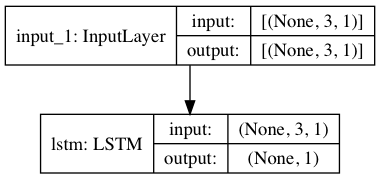

In [5]:
plot_model(model, show_shapes = True)

In [6]:
os.remove("model.png")

<div class="alert alert-info">
<font color=black>

- The previous example outputs a single hidden state for the input sequence with 3 time steps. This is the last one.
- But what if want ti see the all three hidden states?
- This can be done by setting the `return_sequences=True `
- Running the example returns a sequence of 3 values, one hidden state output for each input time step for the single LSTM cell in the layer.
- You must set return_sequences=True when stacking LSTM layers so that the second LSTM layer has a three-dimensional sequence input.

</font>
</div>

In [7]:
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1, return_sequences=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.predict(data))

[[[0.00082577]
  [0.00217318]
  [0.00386686]]]


# Return states
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The output of an LSTM cell or layer of cells is called the hidden state.
- This is confusing, because each LSTM cell retains an internal state that is not output, called the cell state, or c.
- Generally, we do not need to access the cell state unless we are developing sophisticated models where subsequent layers may need to have their cell state initialized with the final cell state of another layer, such as in an encoder-decoder model.
- This may look confusing because both lstm1 and state_h refer to the same hidden state output. The reason for these two tensors being separate will become clear in the next section.
- Running the example returns 3 arrays:
    - The LSTM hidden state output for the last time step.
    - The LSTM hidden state output for the last time step (**again**).
    - The LSTM cell state for the last time step.

</font>
</div>

In [8]:
# define model
inputs1 = Input(shape=(3, 1))
lstm1, state_h, state_c = LSTM(1, return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=[lstm1, state_h, state_c])
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
for i in model.predict(data):
    print(i)

[[-0.11709014]]
[[-0.11709014]]
[[-0.2664755]]


# Return States and Sequences
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- We can access both the sequence of hidden state and the cell states at the same time.
- Running the example, we can see now why the LSTM output tensor and hidden state output tensor are declared separably.
- The layer returns the hidden state for each input time step, then separately, the hidden state output for the last time step and the cell state for the last input time step.
- This can be confirmed by seeing that the last value in the returned sequences (first array) matches the value in the hidden state (second array).

</font>
</div>

In [9]:
# define model
inputs1 = Input(shape=(3, 1))
lstm1, state_h, state_c = LSTM(1, return_sequences=True, return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=[lstm1, state_h, state_c])
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
for i in model.predict(data):
    print(i)

[[[0.00419906]
  [0.01303009]
  [0.02727868]]]
[[0.02727868]]
[[0.04994056]]


# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/

</font>
</div>